# Homework for JLeague competition

## Setting up

In [34]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# Path
input_path = "../input_data/"

# Figure Size
plt.rcParams["figure.figsize"] = (20.0, 10.0)

# Set Display Max Columns
pd.set_option("display.max_columns", 50)

# Set Display Max Rows
pd.set_option("display.max_rows", 200)

# Load datasets
train = pd.read_csv(input_path + "jleague/train.csv", sep=",", header=0, quotechar="\"", encoding='utf-8')
train_add = pd.read_csv(input_path + "jleague/train_add.csv", sep=",", header=0, quotechar="\"", encoding='utf-8')
test = pd.read_csv(input_path + "jleague/test.csv", sep=",", header=0, quotechar="\"", encoding='utf-8')
condition = pd.read_csv(input_path + "jleague/condition.csv", sep=",", header=0, quotechar="\"", encoding='utf-8')
condition_add = pd.read_csv(input_path + "jleague/condition_add.csv", sep=",", header=0, quotechar="\"", encoding='utf-8')
stadium = pd.read_csv(input_path + "jleague/stadium.csv", sep=",", header=0, quotechar="\"", encoding='utf-8')

## Merging datasets for feature engineering

In [35]:
# Train and Test, exclude y= 0
dat = pd.concat([train.query("y > 0"), train_add, test], axis=0)
dat["data"] = dat["y"].apply(lambda x: "Test" if np.isnan(x) else "Train")

# condition
condition = pd.concat([condition, condition_add], axis=0, ignore_index=True) #V6 include add data
dat = pd.merge(dat, condition, how="inner", on="id")

# stadium
dat = pd.merge(dat, stadium, how="inner", left_on="stadium", right_on="name")
print(dat.shape)
dat.head()

(2265, 45)


,id,y,year,stage,match,gameday,time,home,away,stadium,tv,data,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,name,address,capa
0,13994,18250.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,Train,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,ユアテックスタジアム仙台,宮城県仙台市泉区七北田字柳78,19694
1,13995,24316.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,Train,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,13996,17066.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,Train,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,万博記念競技場,大阪府吹田市千里万博公園5-2,21000
3,13997,29603.0,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,Train,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,エディオンスタジアム広島,広島県広島市安佐南区大塚西5-1-1,50000
4,13998,25353.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,Train,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,札幌ドーム,北海道札幌市豊平区羊ヶ丘1,39232


## Feature engineering

In [36]:
# Original FE by sensei
# J1フラグ
dat["J1_flg"] = dat["stage"].apply(lambda x: 1 if x=="Ｊ１" else 0)

# 12月フラグ
dat["month"] = dat["gameday"].apply(lambda x: int(x.split("/")[0]))
dat["December_flg"] = dat["month"].apply(lambda x: 1 if x==12 else 0)

# ホームチームごとの平均観客動員数(y=0の試合を除く)
team_attract = dat[(dat["data"]=="Train") & (dat["y"] > 0)].groupby("home").agg({"y": "mean"}).reset_index(drop=False)
team_attract.columns = ["home", "attract_mean"]
dat = pd.merge(dat, team_attract, how="inner", on="home")

# TV放送数
dat["tv_N"] = dat["tv"].apply(lambda x: len(x.split("／")))

# NHKフラグ
dat["tv_NHK_flg"] = dat["tv"].apply(lambda x: 1 if "ＮＨＫ" in x else 0)

# capa
dat["capa_cate"] = dat["capa"].apply(lambda x: x // 10000)
dat["capa_cate"] = dat["capa_cate"].apply(lambda x: 5.5 if x == 7 else x)
dat["capa_cate"] = dat["capa_cate"].apply(lambda x: 7 if x == 6 else x)

In [37]:
# Added for V2 submission
# calculate capa %
capa_pct = dat[(dat["data"]=="Train") & (dat["y"] > 0)].assign(capa_pct=lambda x: x["y"]/x["capa"])
# home team and stadium mean capa %
home_capa_pct = capa_pct.groupby("home").agg(home_capa_pct=("capa_pct","mean")).reset_index()
away_capa_pct = capa_pct.groupby("away").agg(away_capa_pct=("capa_pct","mean")).reset_index()
stadium_capa_pct = capa_pct.groupby("stadium").agg(stadium_capa_pct=("capa_pct","mean")).reset_index()
dat = pd.merge(dat, home_capa_pct, how="left", on="home")
dat = pd.merge(dat, away_capa_pct, how="left", on="away")
dat = pd.merge(dat, stadium_capa_pct, how="left", on='stadium')
dat['stadium_capa_pct'] = dat['stadium_capa_pct'].fillna(stadium_capa_pct['stadium_capa_pct'].mean())
dat['team_capa_pct'] = (dat["home_capa_pct"] + dat["away_capa_pct"]) / 2
dat["team_capa_pct_y"] = dat['team_capa_pct'] * dat['capa']
dat['stadium_capa_pct_y'] = dat['stadium_capa_pct'] * dat['capa']

In [45]:
# For V3 submission
# getting all players
# setting player name columns
home_col = []
away_col = []
for n in range(1,12):
    home_col.append('home_'+f"{n:02d}")
    away_col.append('away_'+f"{n:02d}")

player_col = home_col + away_col

# unique player list from columns (train+test)
player = dat[player_col].stack().unique().tolist()
# adding list of players in single column
dat['home_players'] = tuple(dat[home_col].itertuples(index=False))
dat['away_players'] = tuple(dat[away_col].itertuples(index=False))
dat['players'] = tuple(dat[player_col].itertuples(index=False))
capa_pct['home_players'] = tuple(capa_pct[home_col].itertuples(index=False))
capa_pct['away_players'] = tuple(capa_pct[away_col].itertuples(index=False))
capa_pct['players'] = tuple(capa_pct[player_col].itertuples(index=False))

# compute player popularity
player_df = pd.DataFrame()
player_capa_pct = []
player_count = []
total_y = []
for name in player:
    played = capa_pct[ capa_pct['players'].apply(lambda x: name in x)]
    player_capa_pct.append(played['capa_pct'].mean())
    player_count.append(len(played['capa_pct']))
    total_y.append(played['y'].sum())
    
player_df['name'] = player
player_df['capa_pct'] = player_capa_pct
player_df['match_count'] = player_count
player_df['total_y'] = total_y
# fill in missing data with mean capa pct (players not in train)
#player_df['capa_pct'] = player_df['capa_pct'].fillna(player_df['capa_pct'].mean())

player_df.isnull().sum()

name            0
capa_pct       50
match_count     0
total_y         0
dtype: int64

In [48]:
player_df[player_df["match_count"] == 0]

,name,capa_pct,match_count,total_y
1285,宮原 和也,NaN,0,0.0
1286,エドゥアルド,NaN,0,0.0
1287,永井 龍,NaN,0,0.0
1288,趙 源熙,NaN,0,0.0
1289,泉澤 仁,NaN,0,0.0
1290,アドリアーノ,NaN,0,0.0
1291,皆川 佑介,NaN,0,0.0
1292,カカウ,NaN,0,0.0
1293,高瀬 優孝,NaN,0,0.0
1294,宋 株熏,NaN,0,0.0


In [6]:
#find hot player?
player_df.sort_values(by='capa_pct',ascending=False).query('match_count >= 5').head(3)

,name,capa_pct,match_count,total_y
1146,ゴイコ カチャル,0.769855,10,272282.0
982,ニール,0.764991,5,116824.0
1139,フォルラン,0.762775,13,368923.0


In [7]:
# compute mean capa_pct for players of both teams, home, and away
match_players = dat.groupby("players").agg(player_match=("y","count")).reset_index()
mean_capa_pct = []
total_y = []

for match in match_players["players"]:
    members = player_df[ player_df["name"].apply(lambda x: x in match) ]
    mean_capa_pct.append(members["capa_pct"].mean())
    total_y.append(members["total_y"].sum() // 0.25e7 * 0.25 )

match_players["mean_allplayer_capa_pct"] = mean_capa_pct
match_players["mean_allplayer_total_y"] = total_y 


# home players
home_players = dat.groupby("home_players").agg(hometeam_match=("y","count")).reset_index()
mean_capa_pct = []
total_y = []

for match in home_players["home_players"]:
    members = player_df[ player_df["name"].apply(lambda x: x in match) ]
    mean_capa_pct.append(members["capa_pct"].mean())
    total_y.append(members["total_y"].sum() // 0.25e7 * 0.25 )

home_players["mean_home_capa_pct"] = mean_capa_pct
home_players["mean_home_total_y"] = total_y 

# away players
away_players = dat.groupby("away_players").agg(awayteam_match=("y","count")).reset_index()
mean_capa_pct = []
total_y = []

for match in away_players["away_players"]:
    members = player_df[ player_df["name"].apply(lambda x: x in match) ]
    mean_capa_pct.append(members["capa_pct"].mean())
    total_y.append(members["total_y"].sum() // 0.25e7 * 0.25 )

away_players["mean_away_capa_pct"] = mean_capa_pct
away_players["mean_away_total_y"] = total_y 

match_players.shape, home_players.shape, away_players.shape

((2265, 4), (2060, 4), (2097, 4))

In [8]:
# Merge into dat
dat = pd.merge(dat, match_players, how="inner", on="players")
dat = pd.merge(dat, home_players, how="inner", on="home_players")
dat = pd.merge(dat, away_players, how="inner", on="away_players")
dat["mean_home_capa_y"] = dat["mean_home_capa_pct"] * dat["capa"]
dat["mean_away_capa_y"] = dat["mean_away_capa_pct"] * dat["capa"]
dat["mean_allplayer_capa_y"] = dat["mean_allplayer_capa_pct"] * dat["capa"]
#dat["mean_allplayer_total_y"] = dat["mean_allplayer_total_y"].apply(lambda x: 2.65 if x == 3 else 2.6 if x == 3.25 else x)
#dat["mean_home_total_y"] = dat["mean_home_total_y"].apply(lambda x: 1.48 if x == 1.75 else 1.44 if x == 2 else x)
dat.shape

(2265, 73)

<Axes: xlabel='mean_allplayer_total_y', ylabel='mean_allplayer_capa_pct'>

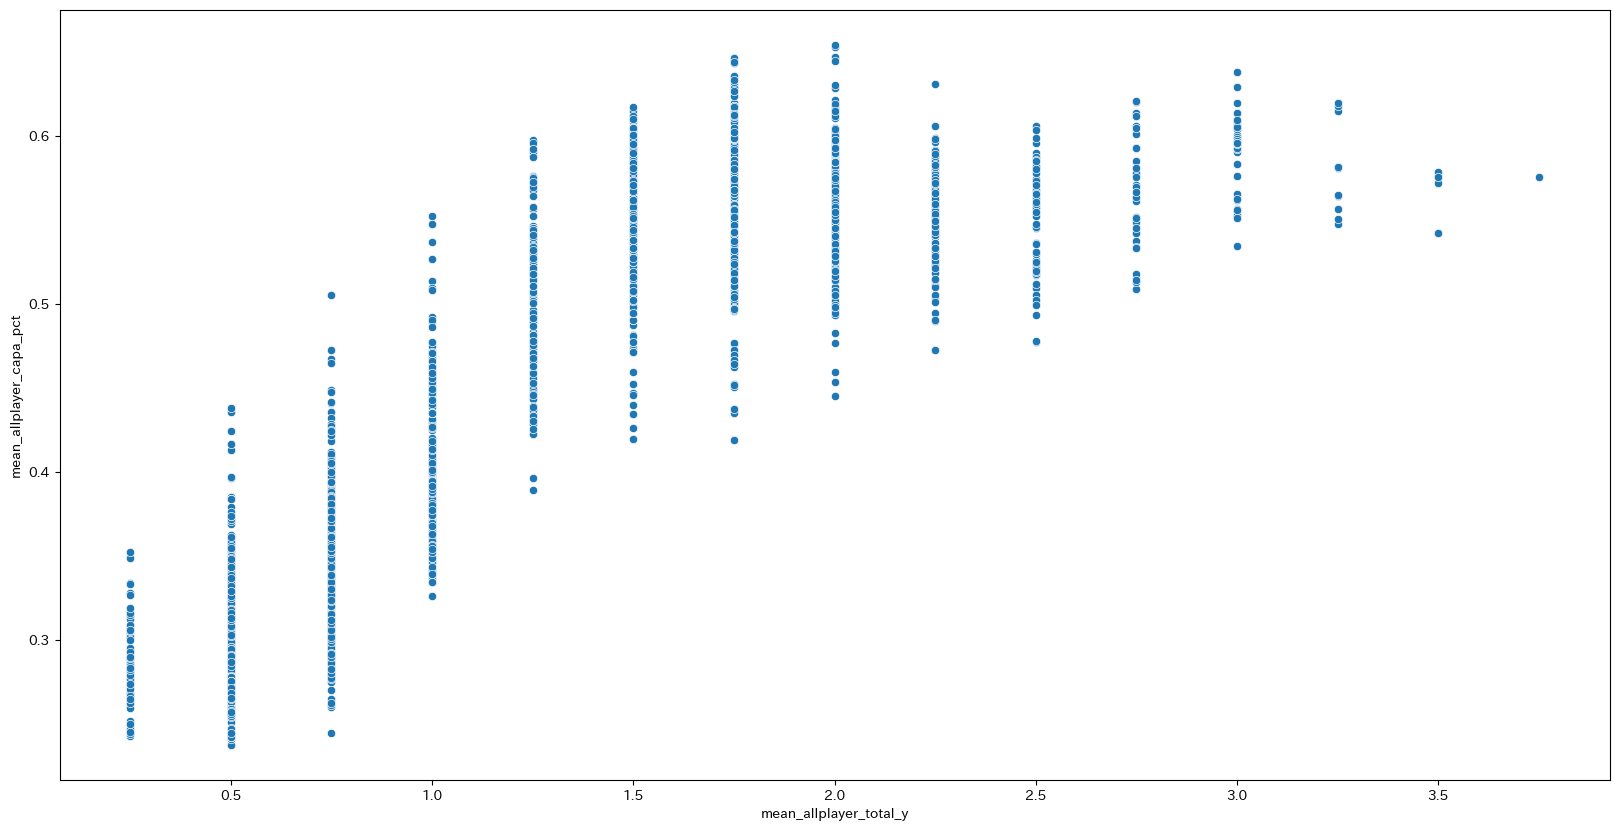

In [9]:
# For V4 submission, add total_y?
g_x = match_players["mean_allplayer_total_y"]
g_y = match_players["mean_allplayer_capa_pct"]
sns.scatterplot(x=g_x,y=g_y)

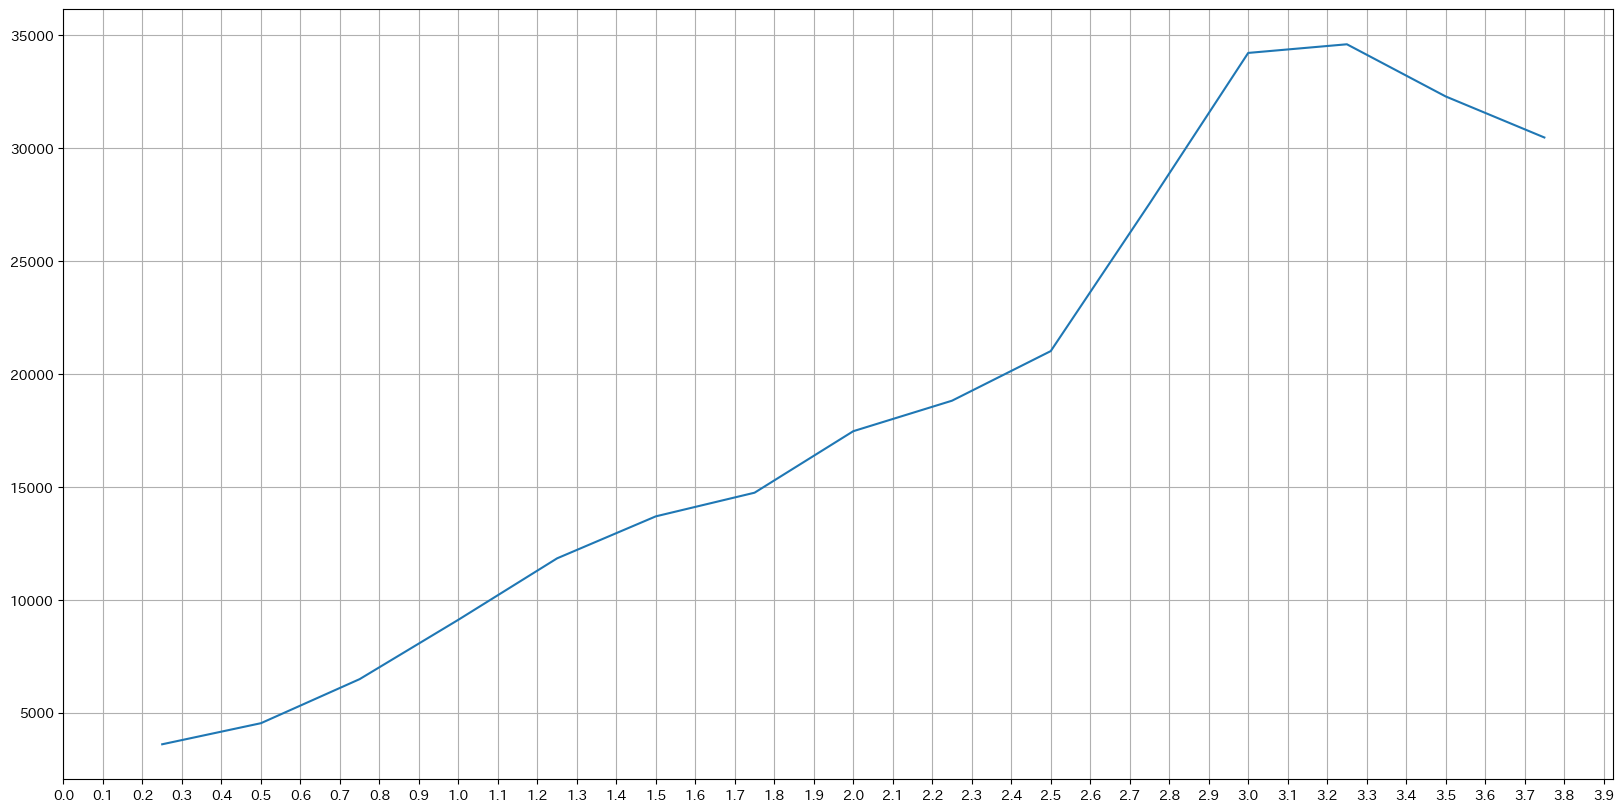

In [10]:
g_x = "mean_allplayer_total_y"

g_dat = dat[dat["data"]=="Train"].groupby(g_x).agg({"y": ["mean", "count"]}).reset_index(drop=False)
g_dat.columns = [g_x, "y", "count"]
plt.plot(g_dat[g_x], g_dat["y"])
plt.grid()
plt.xticks([num * 0.1 for num in range(0, 40)]);
# process > 2.75

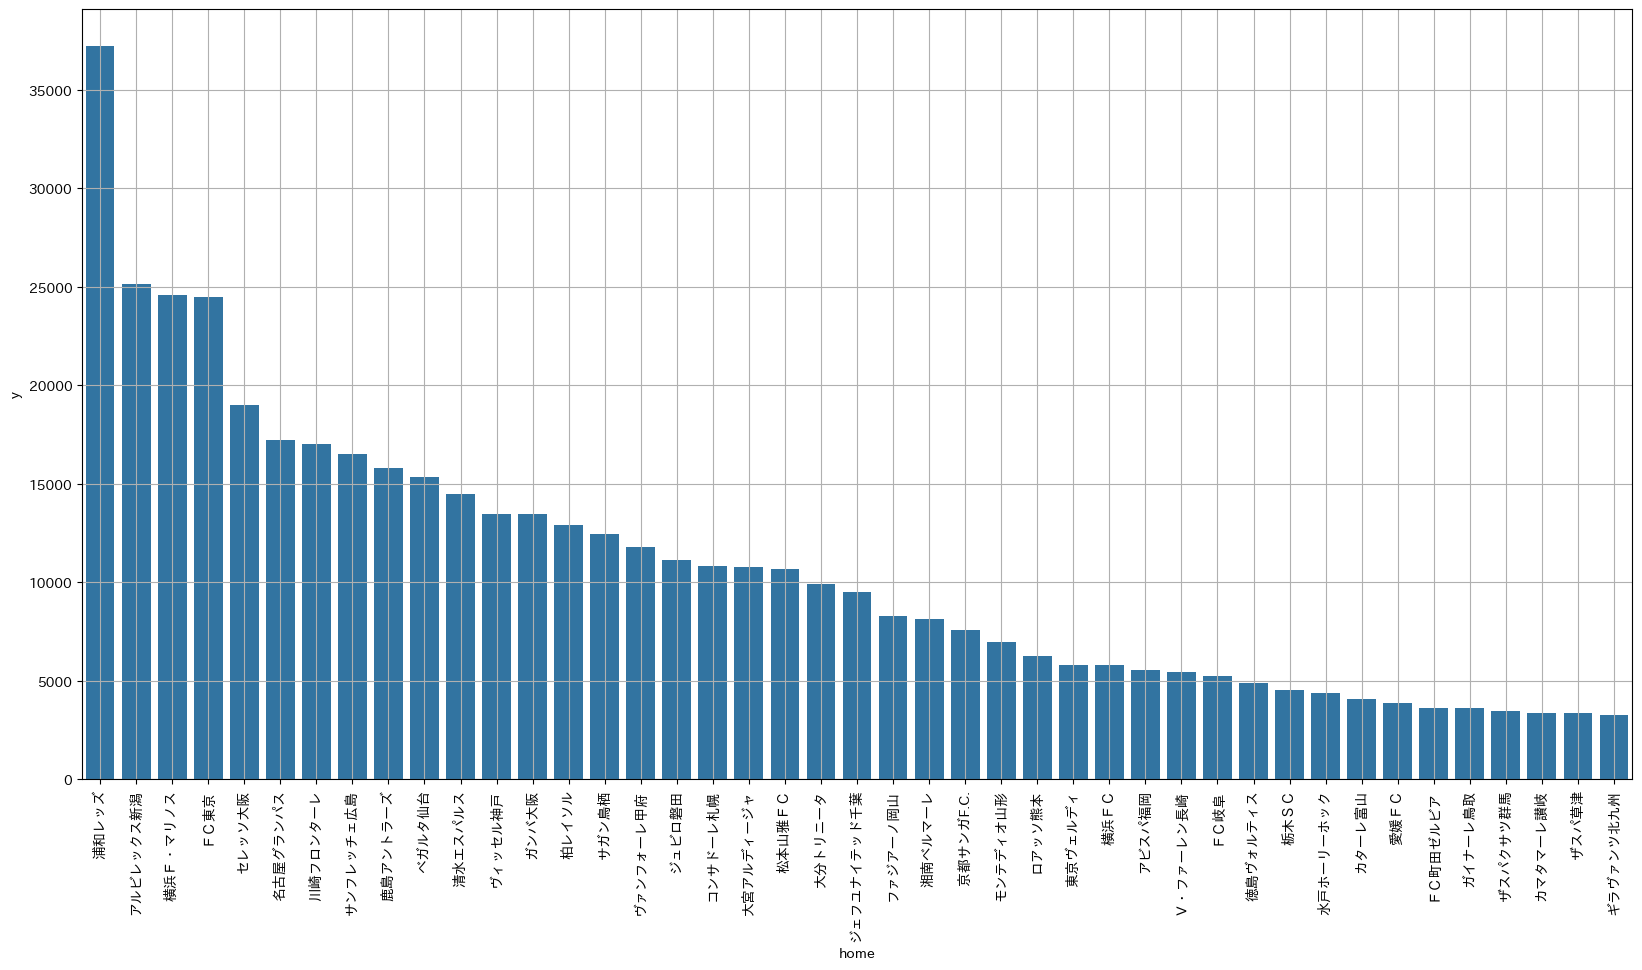

In [11]:
# Hot team matters?
gdat = dat.groupby("home").y.mean().reset_index().sort_values(by="y",ascending=False)

sns.barplot(gdat,x="home",y="y")
plt.xticks(rotation=90);
plt.grid()

In [12]:
# flagging teams
reds = gdat.query("y >= 30000")["home"].tolist()
top_home = gdat.query("30000 > y >= 20000")["home"].tolist()
mid_home = gdat.query("20000 > y >= 10000")["home"].tolist()

dat["home_flg"] = dat["home"].apply(lambda x: 3 if x in reds else 2 if x in top_home else 1 if x in mid_home else 0)
dat["away_flg"] = dat["away"].apply(lambda x: 3 if x in reds else 2 if x in top_home else 1 if x in mid_home else 0)
dat["match_flg"] = dat["home_flg"] + dat["away_flg"]
dat["large_stadium_flg"] = dat["capa"].apply(lambda x: 1 if x >= 40000 else 0)


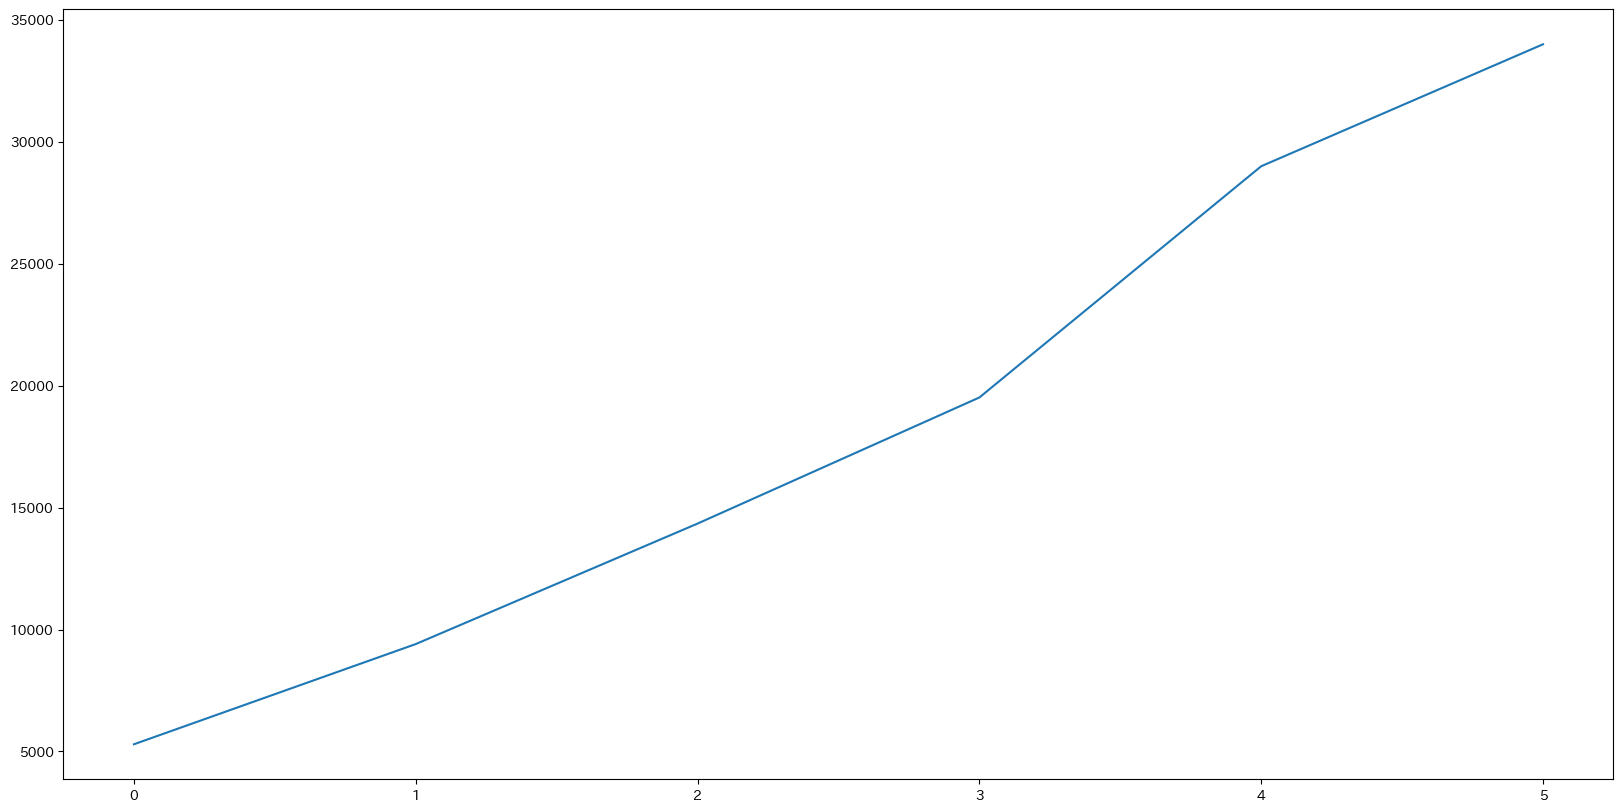

In [13]:
g_x = "match_flg"
g_dat = dat[dat["data"]=="Train"].groupby(g_x).agg({"y": ["mean", "count"]}).reset_index(drop=False)
g_dat.columns = [g_x, "y", "count"]
plt.plot(g_dat[g_x], g_dat["y"]);

In [14]:
# V5 submission, add match number, flagging last 2 match of J1 and J2, weekend flag?
dat['match_n'] = dat['match'].apply(lambda x: x.split('節')[0][1:]).astype(int)
dat['weekday'] = dat['gameday'].apply(lambda x: x[6])
dat['weekend_flg'] = dat["weekday"].apply(lambda x: 1 if x == "土" else 1 if x == "日" else 0)
dat["high_match_flg"] = dat.apply(lambda x: 1 if ((x["J1_flg"] == 1) & (x["match_n"] > 32) & (x["match_flg"] >= 3)) else 0,axis=1)
#dat.query("high_match == 1")[["capa","y","large_stadium_flg","home","away","match_n","year","stage"]]

In [15]:
dat["weather_cate"] = dat["weather"].apply(lambda x: x[0])
weather_dat = dat.groupby("weather_cate").y.mean().reset_index().sort_values("y",ascending=True)
weather_dat

,weather_cate,y
4,雪,4971.500000
3,雨,9725.211454
2,曇,9933.853226
1,晴,11150.286260
0,屋,12681.309091


{'雪': 1, '雨': 2, '曇': 3, '晴': 4, '屋': 5}


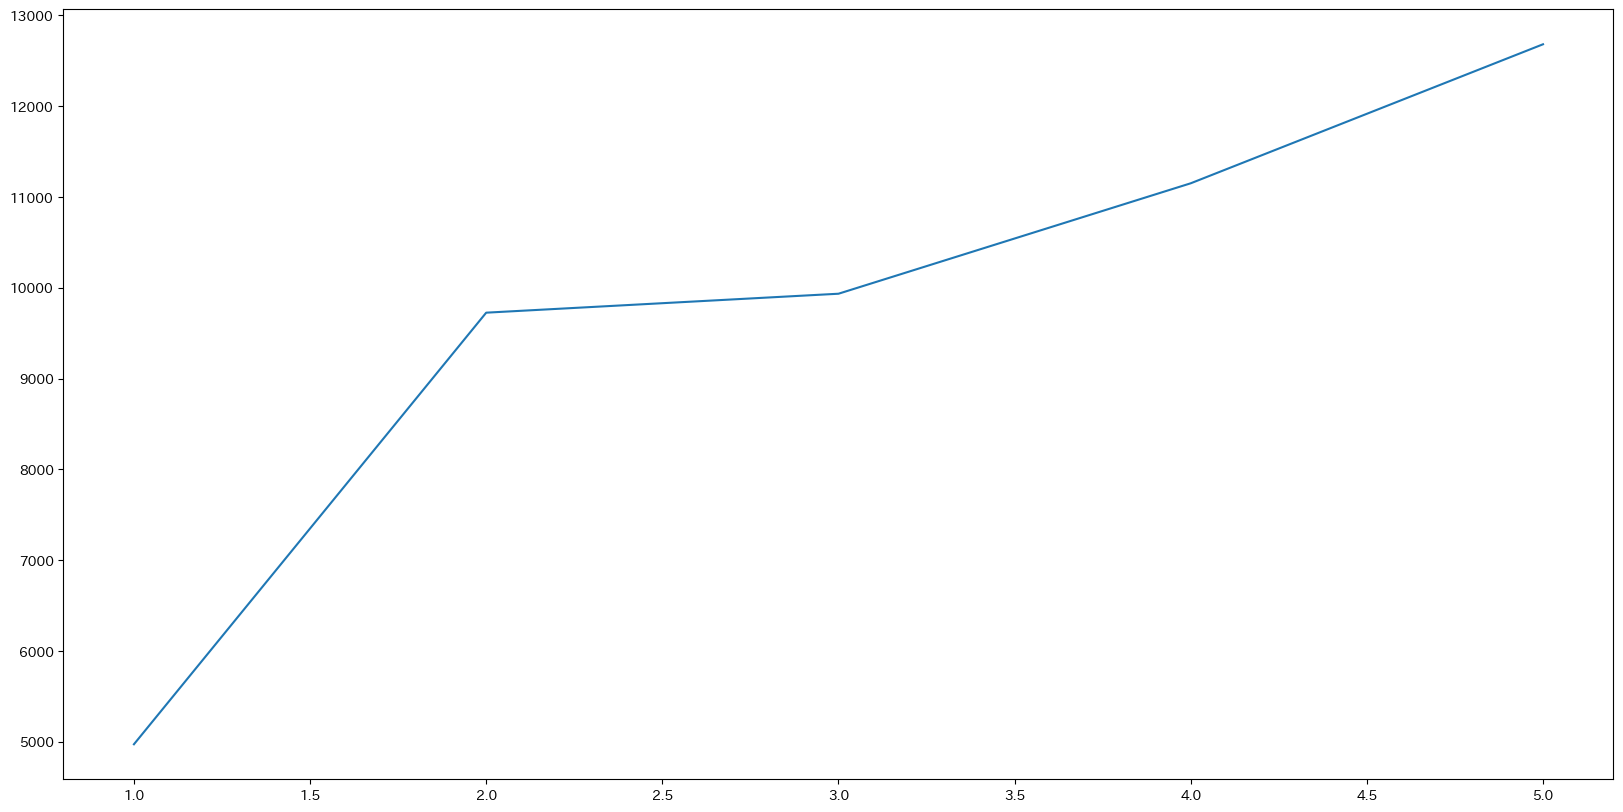

In [16]:
weather_map={}
for n, cate in enumerate(weather_dat["weather_cate"],start=1):
    weather_map[cate] = n
print(weather_map)
dat["weather_flg"] = dat["weather_cate"].map(weather_map)
g_x = "weather_flg"
g_dat = dat[dat["data"]=="Train"].groupby(g_x).agg({"y": ["mean", "count"]}).reset_index(drop=False)
g_dat.columns = [g_x, "y", "count"]
plt.plot(g_dat[g_x], g_dat["y"]);

In [17]:
# V8 add matches on same day?
dat["date"] = dat["year"].astype(str) + "/" + dat["gameday"].str[:5]
match_per_day = dat.groupby("date").match.count().reset_index().rename(columns={"match":"match_per_day"})
dat = pd.merge(dat, match_per_day, how="inner", on="date")
dat["match_per_day_flg"] = dat["match_per_day"].apply(lambda x: 1 if ((x < 10) & (x > 2)) else 0)

dat.shape

(2265, 86)

    match_per_day             y  count        sum     min      max
0               1   5909.173913     23   135911.0  2139.0  17184.0
1               2  11162.071429     14   156269.0  3414.0  25813.0
2               7  19305.535714     28   540555.0  9272.0  54350.0
3               8  15606.838235    136  2122530.0  1363.0  47790.0
4               9  16607.723232    495  8220823.0  2223.0  62632.0
5              10   7731.511765    170  1314357.0  1815.0  36412.0
6              11   6261.272727    715  4476810.0  1104.0  24813.0
7              12   7235.183333    120   868222.0  1692.0  34021.0
8              13   9277.717949     39   361831.0  2124.0  36477.0
9              18  11922.481481     54   643814.0  2551.0  44422.0
10             19  11708.684211     38   444930.0  2101.0  34814.0
11             20  12278.958333    120  1473475.0  1836.0  43564.0


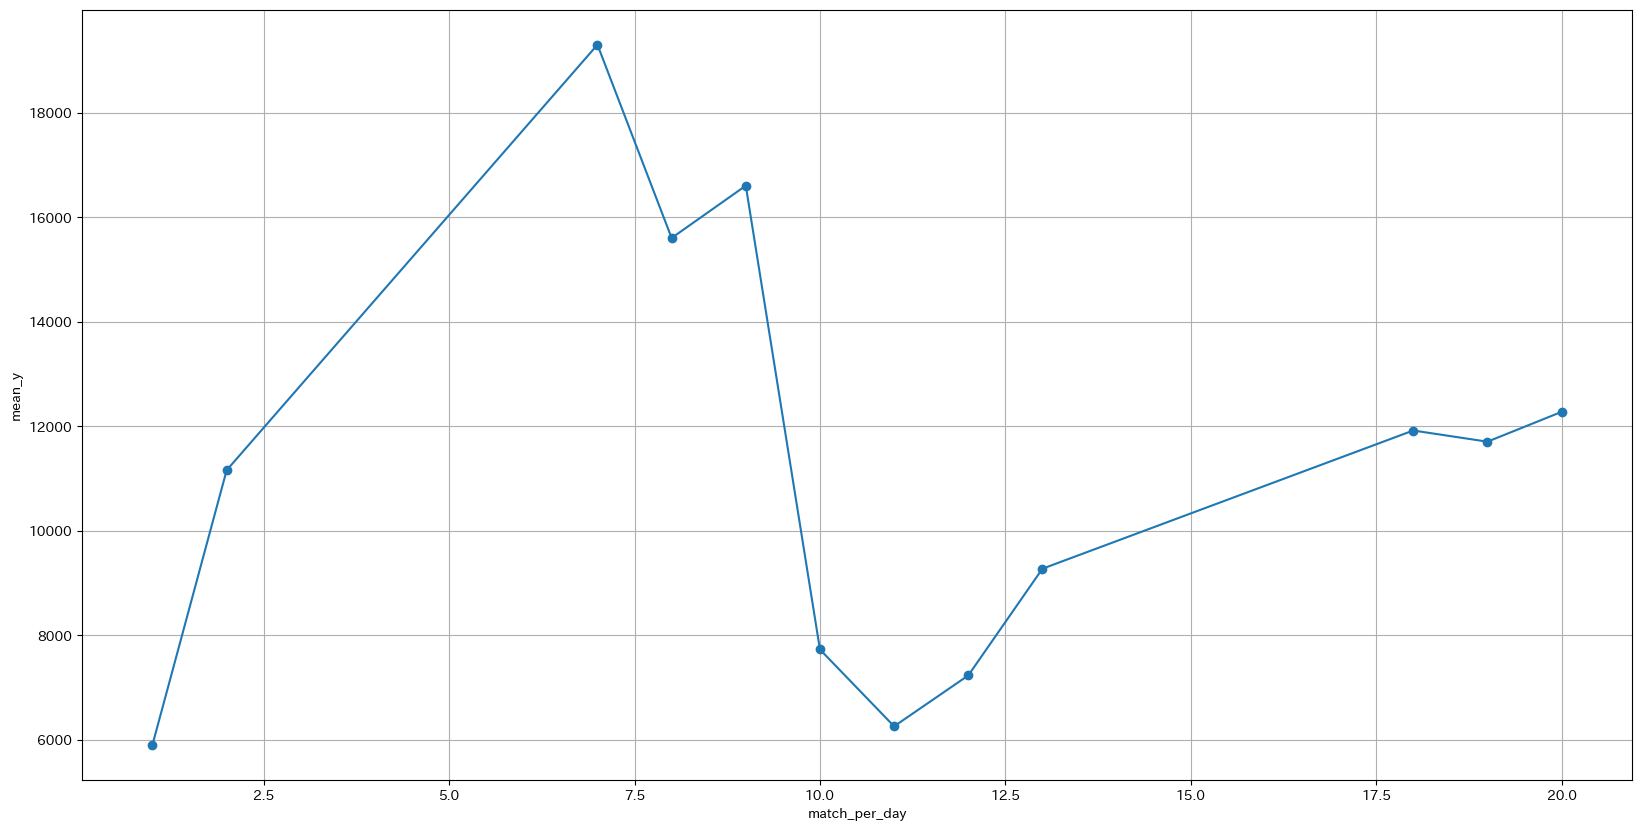

In [33]:
g_x = "match_per_day"

g_dat = dat[dat["data"]=="Train"].groupby(g_x).agg({"y": ["mean", "count", "sum","min", "max"]}).reset_index(drop=False)
g_dat.columns = [g_x, "y", "count", "sum", "min", "max"]
plt.plot(g_dat[g_x], g_dat["y"],marker="o");
plt.grid();
plt.xlabel("match_per_day");
plt.ylabel("mean_y");
print(g_dat)

## Set feature selector

In [19]:
sele = ["J1_flg", "December_flg", "attract_mean", "tv_N", "tv_NHK_flg", "capa_cate",
        'team_capa_pct_y','stadium_capa_pct_y', #V2
        "mean_home_capa_y","mean_away_capa_y","mean_allplayer_capa_y", #V3
        "match_flg","large_stadium_flg","mean_home_total_y","mean_away_total_y","mean_allplayer_total_y", #V4
        "match_n","weekend_flg","high_match_flg", #V5
        "weather_flg", #V7
        "match_per_day_flg" # V8
       ]

## Check Multicollinearity
　多重共線性の確認は, 相関係数にて行う.

In [20]:
dat[sele].corr(method="spearman")

,J1_flg,December_flg,attract_mean,tv_N,tv_NHK_flg,capa_cate,team_capa_pct_y,stadium_capa_pct_y,mean_home_capa_y,mean_away_capa_y,mean_allplayer_capa_y,match_flg,large_stadium_flg,mean_home_total_y,mean_away_total_y,mean_allplayer_total_y,match_n,weekend_flg,high_match_flg,weather_flg,match_per_day_flg
J1_flg,1.000000,0.134895,0.790667,0.110694,0.218472,0.311285,0.765363,0.736772,0.731319,0.704625,0.734580,0.868894,0.416793,0.800260,0.803534,0.849535,-0.156409,0.031682,0.118807,0.036509,0.772323
December_flg,0.134895,1.000000,0.113484,0.072815,0.094553,0.074974,0.113602,0.106588,0.107679,0.110348,0.111387,0.117280,0.093501,0.108427,0.099437,0.107059,0.143001,0.034772,0.456279,0.055831,0.138030
attract_mean,0.790667,0.113484,1.000000,0.087543,0.192126,0.523545,0.903743,0.938179,0.908406,0.744267,0.846995,0.828709,0.514640,0.902696,0.622494,0.841019,-0.120672,0.032034,0.116815,0.058268,0.601542
tv_N,0.110694,0.072815,0.087543,1.000000,0.493535,0.059703,0.076003,0.071635,0.060118,0.062364,0.055193,0.096047,0.074825,0.118863,0.112692,0.124440,-0.108622,0.050550,0.052112,-0.010723,0.077952
tv_NHK_flg,0.218472,0.094553,0.192126,0.493535,1.000000,0.159787,0.211343,0.192605,0.202687,0.203811,0.207166,0.196136,0.168002,0.190165,0.187495,0.197032,-0.048915,0.065792,0.078891,0.021565,0.171875
capa_cate,0.311285,0.074974,0.523545,0.059703,0.159787,1.000000,0.717562,0.623682,0.731333,0.766480,0.768777,0.372613,0.743828,0.402264,0.257251,0.371959,-0.064966,0.016329,0.080510,0.067683,0.224713
team_capa_pct_y,0.765363,0.113602,0.903743,0.076003,0.211343,0.717562,1.000000,0.945363,0.977313,0.917371,0.974673,0.807698,0.659333,0.805558,0.664630,0.815948,-0.130751,0.032566,0.121071,0.080456,0.579455
stadium_capa_pct_y,0.736772,0.106588,0.938179,0.071635,0.192605,0.623682,0.945363,1.000000,0.954908,0.800883,0.898010,0.773831,0.616196,0.843209,0.590950,0.791144,-0.128523,0.034011,0.109577,0.062771,0.554258
mean_home_capa_y,0.731319,0.107679,0.908406,0.060118,0.202687,0.731333,0.977313,0.954908,1.000000,0.881035,0.963727,0.763712,0.678342,0.809279,0.585964,0.774012,-0.105099,0.039281,0.116688,0.087576,0.557526
mean_away_capa_y,0.704625,0.110348,0.744267,0.062364,0.203811,0.766480,0.917371,0.800883,0.881035,1.000000,0.970845,0.732574,0.683174,0.652765,0.685138,0.739628,-0.103661,0.024315,0.112697,0.077841,0.540444


## RMSE validation

In [21]:
from sklearn.model_selection import train_test_split
def rmse(y_actual, y_predicted):
    return np.sqrt(np.mean((y_predicted - y_actual) ** 2))

train = dat[(dat["data"]=="Train") & (dat["y"] > 0)].copy()
train_x = train[sele].copy()
train_y = train[["y"]].copy()

train_x, valid_x, train_y, valid_y= train_test_split(train_x, train_y, test_size=0.2, shuffle=False)
line_model = linear_model.LinearRegression().fit(train_x, train_y)
train_pred = line_model.predict(train_x)
valid_pred = line_model.predict(valid_x)
rmse(train_y, train_pred), rmse(valid_y, valid_pred)

# V3 (np.float64(3325.8692966966337), np.float64(3518.6294330183746)) - submit 3852.995659296009
# V4 (np.float64(3161.8644261851546), np.float64(3543.5848064646643)) - submit 3773.384015054846
# V5 (np.float64(3055.4329830339216), np.float64(3583.842557185702)) - submit 3694.0100191214115
# V6 (np.float64(3262.9085916279364), np.float64(3068.609241864952)) - submit 3724.838843044832
# V7 (np.float64(3235.9796957556377), np.float64(3031.403242276495))
# V8


(np.float64(3221.5660185846114), np.float64(3032.798502377374))

In [22]:
## RMSE with tree model?
from sklearn.tree import DecisionTreeRegressor
train_x = train[sele].copy()
train_y = train["y"].copy()

train_x, valid_x, train_y, valid_y= train_test_split(train_x, train_y, test_size=0.2, shuffle=False)

tree_model = DecisionTreeRegressor(
    criterion='absolute_error', #criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”},
    splitter="best",
    random_state=17,
    max_depth=None,
    #min_samples_split=2,
    #min_samples_leaf=1
)

tree_model = tree_model.fit(train_x, train_y)
train_pred = tree_model.predict(train_x)
valid_pred = tree_model.predict(valid_x)
rmse(train_y, train_pred), rmse(valid_y, valid_pred)

# V5 (np.float64(0.0), np.float64(4250.431984543754)) - submit 5059.92574419242
# V6 (np.float64(0.0), np.float64(4242.535266315827))


(np.float64(0.0), np.float64(4412.916558806342))

In [23]:
# Randomforest parameters optimization
from sklearn.model_selection import GridSearchCV
params = { "n_estimators" : [100,200,300],
           "max_features" : ["sqrt","log2"],
           "max_depth" : [None,5,10],
           "min_samples_split" : [2],
           "min_samples_leaf" : [1,2,5]
         }

rf_grid = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid = params,
                      cv = 10,
                      verbose = 3,
                      #n_jobs=-1,
                      scoring='neg_root_mean_squared_error')

#rf_grid.fit(train[sele].copy(),train["y"].copy())

In [24]:
# RMSE of Randomforest?
train_x = train[sele].copy()
train_y = train[sele].copy()

train_x, valid_x, train_y, valid_y= train_test_split(train_x, train_y, test_size=0.2, shuffle=False)
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_features="sqrt",
    max_depth=None,
    random_state=37,
    n_jobs=-1
    )
rf_model.fit(train_x,train_y)
train_pred = rf_model.predict(train_x)
valid_pred = rf_model.predict(valid_x)
rmse(train_y, train_pred), rmse(valid_y, valid_pred)

# V6 (np.float64(1660.4473536829869), np.float64(3096.153784586077)) - submit 3710.4561840835777
# V7 (np.float64(100.83132333098045), np.float64(253.83815216148736)) - submit 3591.207178002024
# V8 (np.float64(101.51099429853731), np.float64(252.9192129331071))


(np.float64(101.51099429853734), np.float64(252.9192129331071))

In [25]:
train_x = train[sele].copy()
train_y = train["y"].copy()
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_features="sqrt",
    max_depth=None,
    random_state=37,
    n_jobs=-1
    )
rf_model.fit(train_x,train_y)
train_pred = rf_model.predict(train_x)
train["pred"] = train_pred
train["pred - y"] = train["pred"] - train_y
train["abs(pred - y)"] = train["pred - y"].abs()
view_col = ["id","stage","match","match_flg","gameday","home","away","stadium","temperature","capa","y","pred","pred - y","abs(pred - y)","team_capa_pct_y","stadium_capa_pct_y"]
train[view_col].sort_values(by="abs(pred - y)",ascending=False).head(30)

,id,stage,match,match_flg,gameday,home,away,stadium,temperature,capa,y,pred,pred - y,abs(pred - y),team_capa_pct_y,stadium_capa_pct_y
1843,15127,Ｊ１,第３３節第１日,4,11/30(土),横浜Ｆ・マリノス,アルビレックス新潟,日産スタジアム,12.7,72327,62632.0,50577.556667,-12054.443333,12054.443333,36628.287273,27664.823529
1408,15725,Ｊ１,第７節第２日,2,04/12(土),セレッソ大阪,ガンバ大阪,ヤンマースタジアム長居,18.0,47816,42723.0,35598.050000,-7124.950000,7124.950000,30125.498664,26038.157895
1442,15765,Ｊ１,第１１節第１日,2,05/03(土・祝),名古屋グランパス,セレッソ大阪,豊田スタジアム,17.8,40000,38966.0,31981.776667,-6984.223333,6984.223333,24180.557964,20624.360000
715,14880,Ｊ１,第５節第１日,4,04/06(土),浦和レッズ,ジュビロ磐田,埼玉スタジアム２００２,15.6,63700,23295.0,29877.820000,6582.820000,6582.820000,35770.936960,37248.690476
693,14852,Ｊ１,第２節第１日,4,03/09(土),浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,21.6,63700,52293.0,45838.356667,-6454.643333,6454.643333,36612.514966,37248.690476
1462,15787,Ｊ１,第１４節第１日,4,05/17(土),浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,23.6,63700,54350.0,48575.306667,-5774.693333,5774.693333,39246.053359,37248.690476
1384,15698,Ｊ１,第４節第１日,2,03/23(日),鹿島アントラーズ,セレッソ大阪,県立カシマサッカースタジアム,13.9,40728,32099.0,26528.920000,-5570.080000,5570.080000,21092.312978,15814.738095
834,15015,Ｊ１,第２０節第１日,1,08/10(土),大分トリニータ,柏レイソル,大分銀行ドーム,31.3,40000,23814.0,18244.740000,-5569.260000,5569.260000,15601.705484,9927.400000
748,14916,Ｊ１,第９節第２日,4,05/29(水),浦和レッズ,ベガルタ仙台,埼玉スタジアム２００２,21.2,63700,24184.0,29303.873333,5119.873333,5119.873333,35465.305671,37248.690476
4,13998,Ｊ１,第１節第１日,2,03/10(土),コンサドーレ札幌,ジュビロ磐田,札幌ドーム,22.5,39232,25353.0,20506.326667,-4846.673333,4846.673333,17466.951543,13362.200000


In [26]:
train_x = train[sele].copy()
train_y = train["y"].copy()
model = linear_model.LinearRegression().fit(train_x, train_y)
train_pred = model.predict(train_x)

train["pred"] = train_pred
train["pred - y"] = train["pred"] - train_y
train["abs(pred - y)"] = train["pred - y"].abs()
view_col = ["id","stage","match","match_flg","gameday","home","away","stadium","temperature","capa","y","pred","pred - y","abs(pred - y)","team_capa_pct_y","stadium_capa_pct_y"]
train[view_col].sort_values(by="abs(pred - y)",ascending=False).head(30)


,id,stage,match,match_flg,gameday,home,away,stadium,temperature,capa,y,pred,pred - y,abs(pred - y),team_capa_pct_y,stadium_capa_pct_y
1843,15127,Ｊ１,第３３節第１日,4,11/30(土),横浜Ｆ・マリノス,アルビレックス新潟,日産スタジアム,12.7,72327,62632.0,37992.683518,-24639.316482,24639.316482,36628.287273,27664.823529
1408,15725,Ｊ１,第７節第２日,2,04/12(土),セレッソ大阪,ガンバ大阪,ヤンマースタジアム長居,18.0,47816,42723.0,24758.515888,-17964.484112,17964.484112,30125.498664,26038.157895
1442,15765,Ｊ１,第１１節第１日,2,05/03(土・祝),名古屋グランパス,セレッソ大阪,豊田スタジアム,17.8,40000,38966.0,22113.470767,-16852.529233,16852.529233,24180.557964,20624.360000
1417,15736,Ｊ１,第８節第１日,3,04/19(土),ＦＣ東京,セレッソ大阪,味の素スタジアム,13.2,49970,40761.0,24419.464564,-16341.535436,16341.535436,28295.383011,14599.506329
693,14852,Ｊ１,第２節第１日,4,03/09(土),浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,21.6,63700,52293.0,36481.883953,-15811.116047,15811.116047,36612.514966,37248.690476
1384,15698,Ｊ１,第４節第１日,2,03/23(日),鹿島アントラーズ,セレッソ大阪,県立カシマサッカースタジアム,13.9,40728,32099.0,16963.576355,-15135.423645,15135.423645,21092.312978,15814.738095
807,14982,Ｊ１,第１７節第１日,5,07/17(水),浦和レッズ,横浜Ｆ・マリノス,埼玉スタジアム２００２,24.1,63700,23725.0,38237.293946,14512.293946,14512.293946,38681.046164,37248.690476
917,15107,Ｊ１,第３１節第１日,3,11/10(日),ＦＣ東京,セレッソ大阪,味の素スタジアム,21.1,49970,40371.0,26526.076501,-13844.923499,13844.923499,28295.383011,14599.506329
1462,15787,Ｊ１,第１４節第１日,4,05/17(土),浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,23.6,63700,54350.0,40607.700458,-13742.299542,13742.299542,39246.053359,37248.690476
895,15084,Ｊ１,第２８節第１日,4,10/05(土),浦和レッズ,大宮アルディージャ,埼玉スタジアム２００２,19.9,63700,47790.0,34336.706132,-13453.293868,13453.293868,35005.315585,37248.690476


## Make Model

In [27]:
# Train
train = dat[(dat["data"]=="Train") & (dat["y"] > 0)].copy()
train_x = train[sele].copy()
train_y = train["y"].copy()

# Test
test = dat[dat["data"]=="Test"].copy()
test_x = test[sele].copy()

# Learning
# Linear regression model
line_model = linear_model.LinearRegression()
line_model.fit(train_x, train_y)

# Decision tree model
tree_model = DecisionTreeRegressor(
    criterion='absolute_error', #criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”},
    splitter="best",
    random_state=17,
    max_depth=None)
tree_model.fit(train_x,train_y)

# RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_features="sqrt",
    max_depth=None,
    random_state=37,
    n_jobs=-1
    )
rf_model.fit(train_x,train_y)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Predict

In [28]:
models = test[["id"]].copy()
models["line_pred"] = line_model.predict(test_x)
models["tree_pred"] = tree_model.predict(test_x)
models["rf_pred"] = rf_model.predict(test_x)

models = models.assign(pred=(models["line_pred"] + models["rf_pred"]) / 2)
models.head()

,id,line_pred,tree_pred,rf_pred,pred
1952,15822,14278.462555,13470.0,13627.950000,13953.206277
1953,15823,17665.285865,18012.0,15725.890000,16695.587933
1954,15824,34702.366118,31175.0,34508.326667,34605.346392
1955,15825,11370.963782,10769.0,11149.493333,11260.228558
1956,15827,25589.001931,24176.0,22869.103333,24229.052632


## Predicted Value Correction

In [29]:
train_y.min()

np.float64(1104.0)

In [30]:
def correction_fun_1(row):
    return max(row["pred"], 1104)

def correction_fun_2(row):
    return min(row["pred"], row["capa"])

pred_correction = test[["capa"]].copy()
pred_correction["pred"] = models["pred"]
pred_correction["pred"] = pred_correction.apply(correction_fun_1, axis=1)
pred_correction["pred"] = pred_correction.apply(correction_fun_2, axis=1)
pred_correction["pred"]

1952    13953.206277
1953    16695.587933
1954    34605.346392
1955    11260.228558
1956    24229.052632
            ...     
2260     4957.587483
2261     8564.408869
2262     3925.437703
2263     6272.385358
2264    11244.411728
Name: pred, Length: 313, dtype: float64

## Output

In [31]:
submit = test[["id"]].copy()
submit["pred"] = pred_correction["pred"]
submit.describe()

,id,pred
count,313.000000,313.000000
mean,16142.252396,11336.603354
std,224.441223,7522.803173
min,15822.000000,2185.958847
25%,15907.000000,5894.367757
50%,16261.000000,9234.270488
75%,16346.000000,14166.294353
max,16436.000000,45359.005527


In [32]:
#submit.to_csv("../submit/20251027_submit_linear_v7.csv",  sep=",", index=False, header=False)
#submit.to_csv("../submit/20251021_submit_tree_v4.csv",  sep=",", index=False, header=False)
#submit.to_csv("../submit/20251027_submit_rfensemble_v7.csv",  sep=",", index=False, header=False)
submit.to_csv("../submit/20251028_submit_rfline_ensemble_v8.csv",  sep=",", index=False, header=False)

## Done!